# This is Soccer data from FIFA 2019 players. We will analyze soccer players

## Package Used
- Numpy
- Pandas
- Matplolib
- Seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# Path of the data file to read
iowa_file_path = './data/soccerData/data.csv'

soccer_data = pd.read_csv(iowa_file_path)



In [4]:
soccer_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
soccer_data.shape

(18207, 89)

The dataset have 18207 rows and 89 columns

In [8]:
soccer_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Dropping **Unnamed: 0** since this is not useful for analysis

In [10]:
soccer_data.drop("Unnamed: 0",axis=1,inplace=True)
soccer_data.head()

KeyError: "['Unnamed: 0'] not found in axis"

Removing spaces in the for data clean up

In [13]:
soccer_data.columns = [c.replace(' ', '') for c in soccer_data.columns]

## Some analysis and findings on Wage.
- Wage is in String Data type.
- Some Wage values is in form €amountK (Starting with € and end with K)
- All the values are not having K at the end.
- So at first we have to remove € and K and transform Wedge value into numeric value.

In [15]:
soccer_data["Wage"].head()
soccer_data[~soccer_data["Wage"].str.endswith("K")]["Wage"].head()

soccer_data.Wage = soccer_data.Wage.str.replace("€","")
soccer_data.Wage = soccer_data.Wage.str.replace("K","").astype("float")
soccer_data.Wage.head() 

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

## The number of players in the dataset

In [18]:
soccer_data.ID.unique().shape

(18207,)

In [ ]:
counts_preferred_foot = soccer_data["PreferredFoot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["PreferredFoot","Count"]
print(counts_preferred_foot)

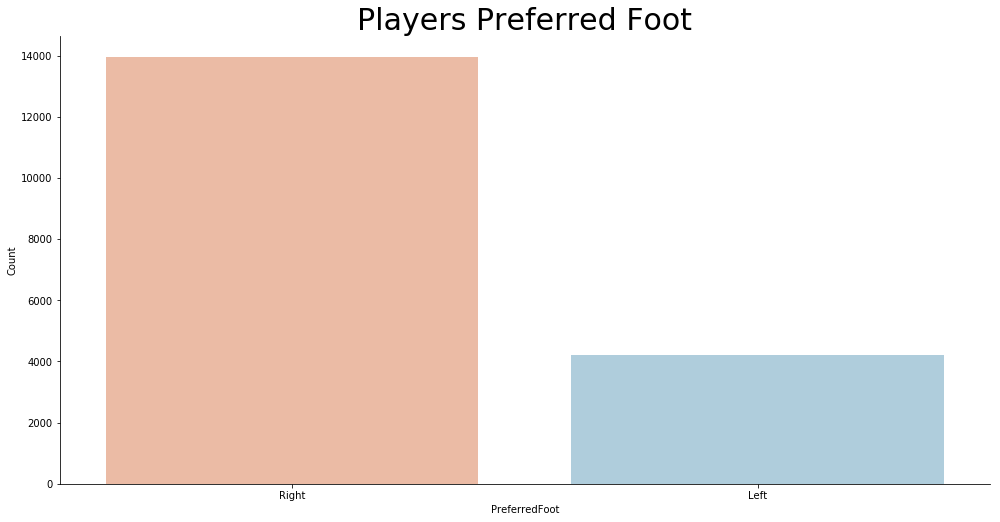

In [21]:
pt = sns.catplot(y="Count",
            x="PreferredFoot", data=counts_preferred_foot,
           palette="RdBu",height=7, aspect=2, kind="bar");
plt.title("Players Preferred Foot",
          fontsize=30);

## Does preferred foot have overall ranking?

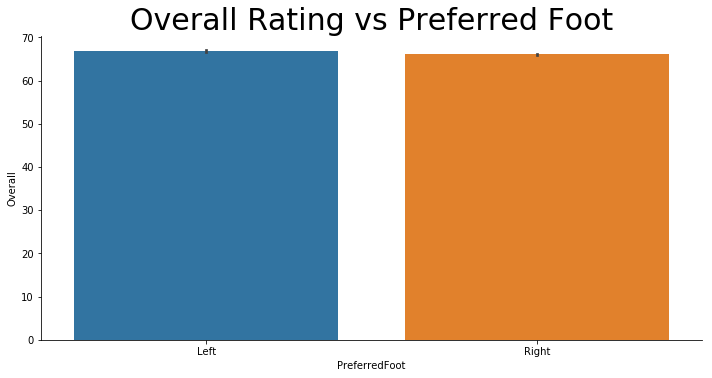

In [24]:
sns.catplot(x="PreferredFoot", y="Overall", data=soccer_data,
            aspect=2, kind="bar");
plt.title("Overall Rating vs Preferred Foot",
          fontsize=30);

In [25]:
counts_Nationality = soccer_data["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


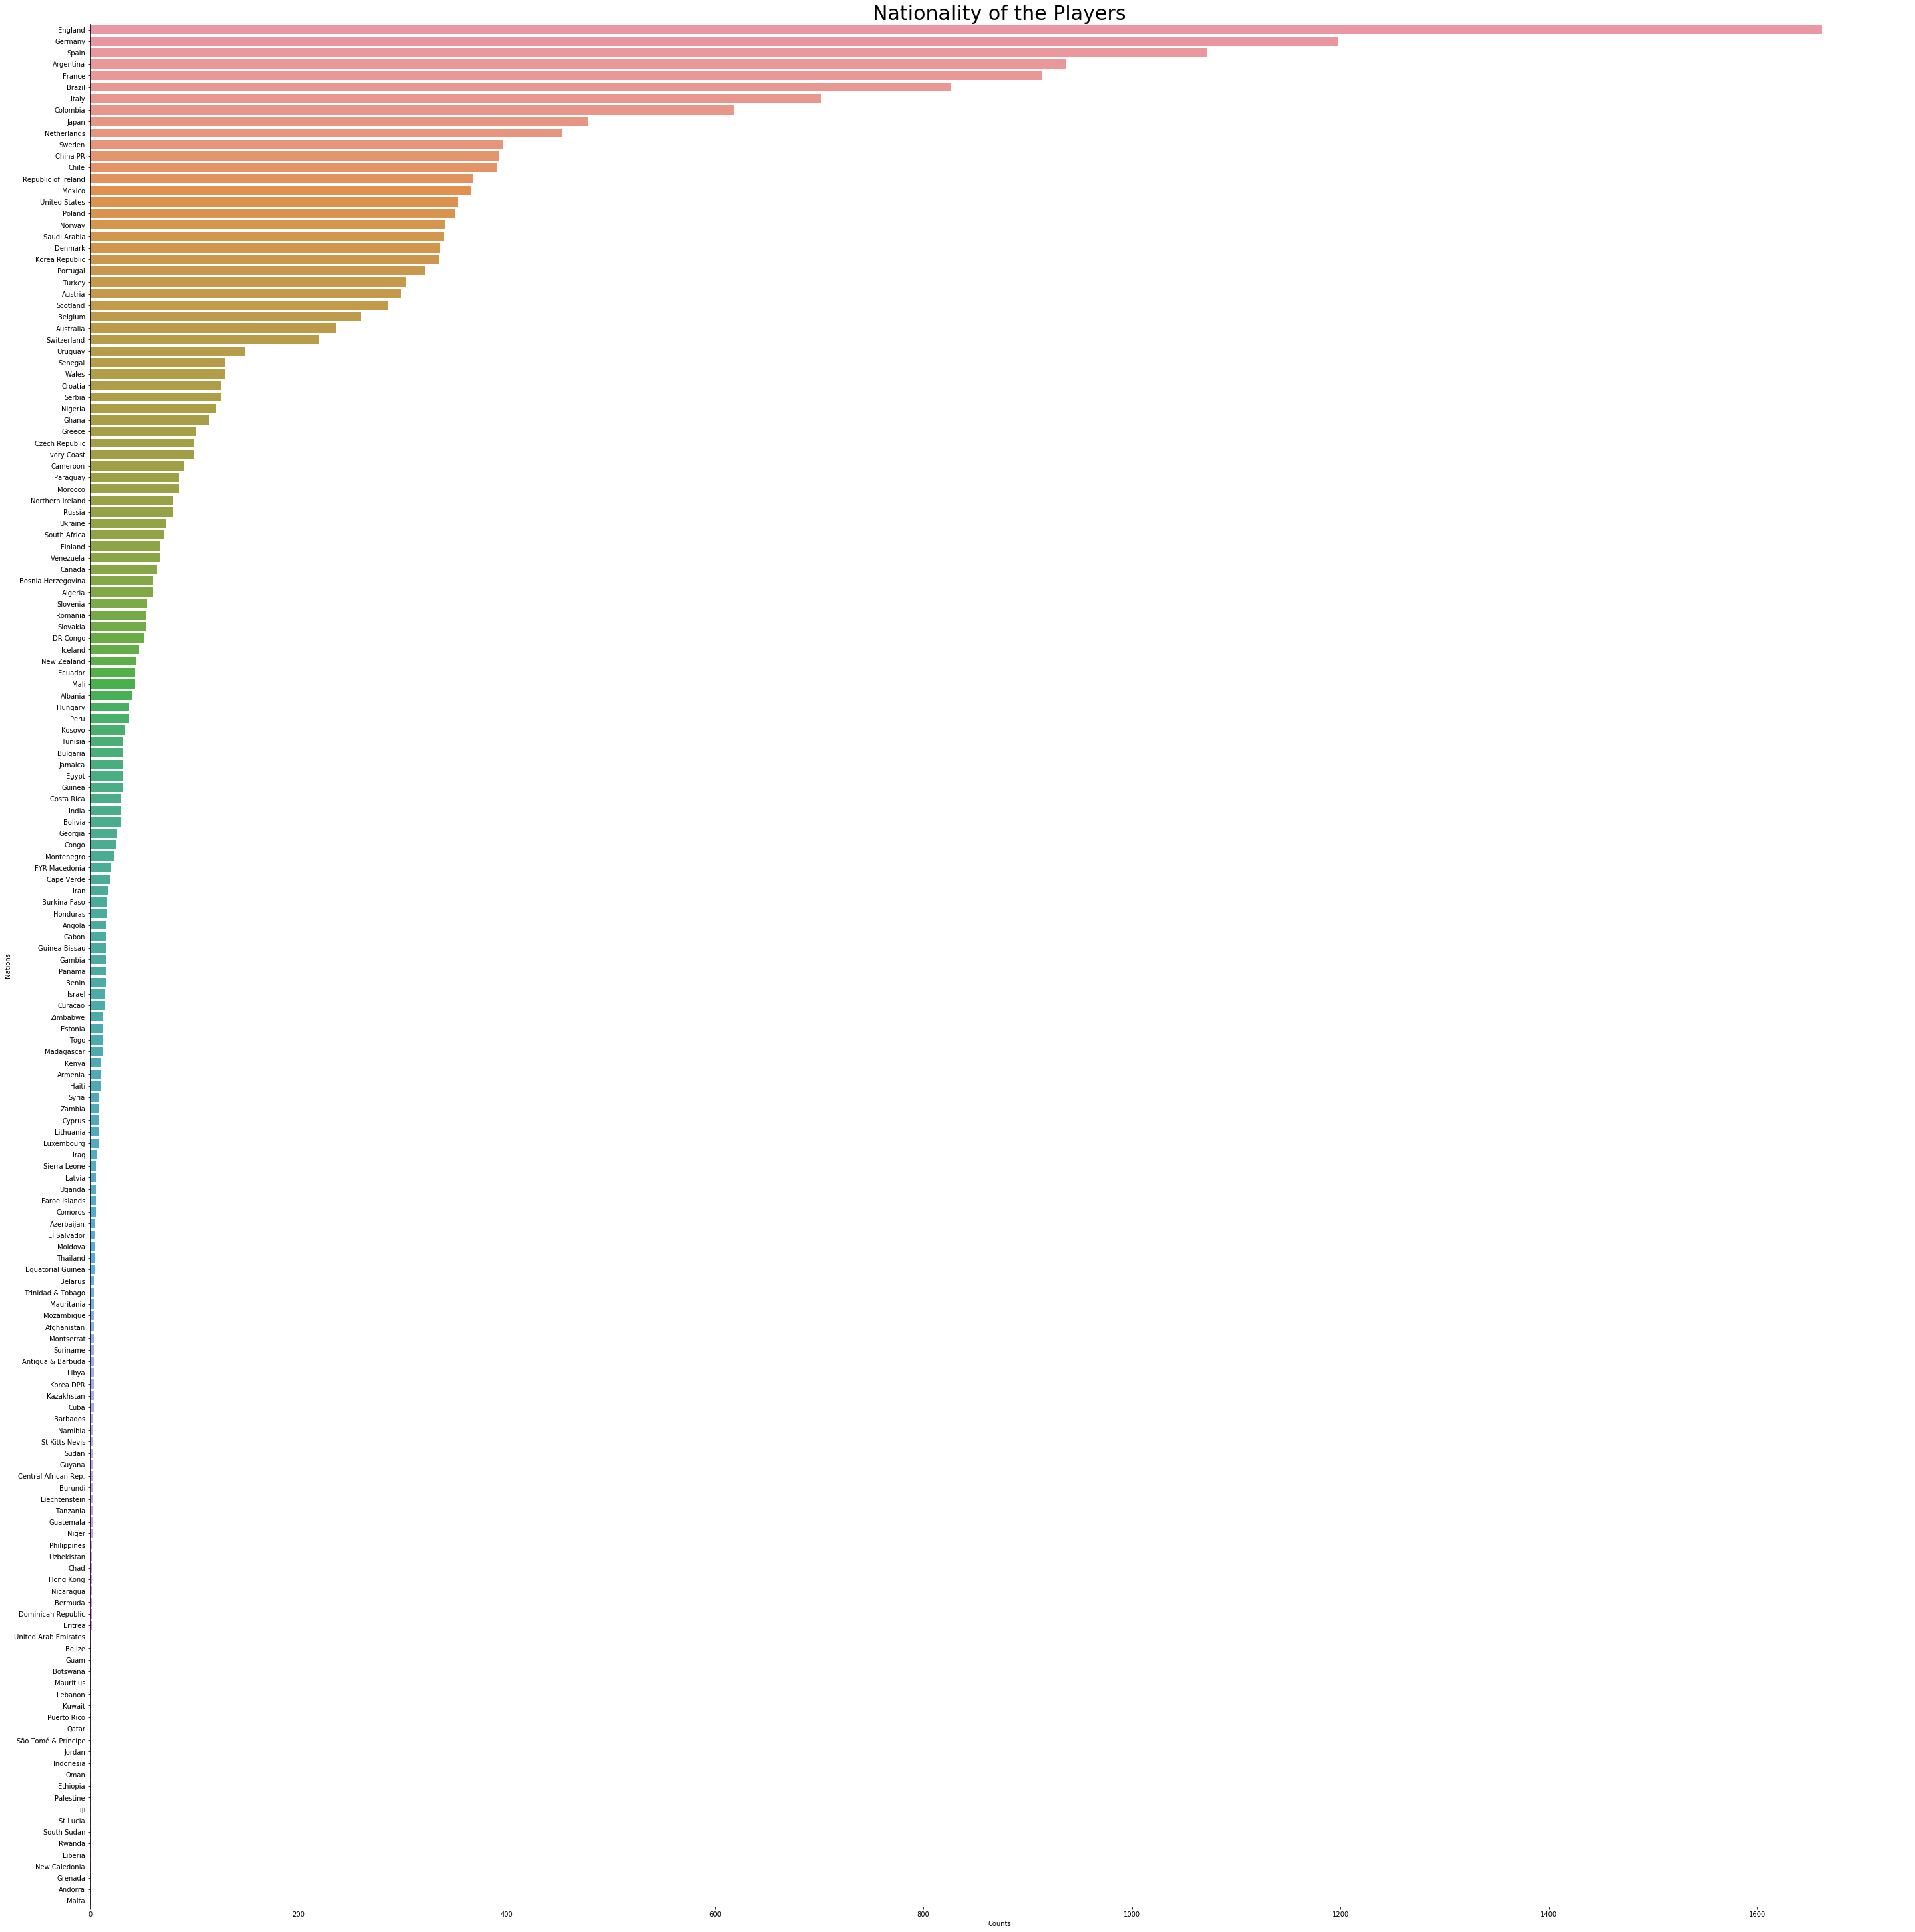

In [27]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality,
            height=40,kind="bar")
plt.title("Nationality of the Players",
          fontsize=30);

In [28]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

Nations  Counts
0               England    1662
1               Germany    1198
2                 Spain    1072
3             Argentina     937
4                France     914
5                Brazil     827
6                 Italy     702
7              Colombia     618
8                 Japan     478
9           Netherlands     453
10               Sweden     397
11             China PR     392
12                Chile     391
13  Republic of Ireland     368
14               Mexico     366
15        United States     353
16               Poland     350
17               Norway     341
18         Saudi Arabia     340
19              Denmark     336


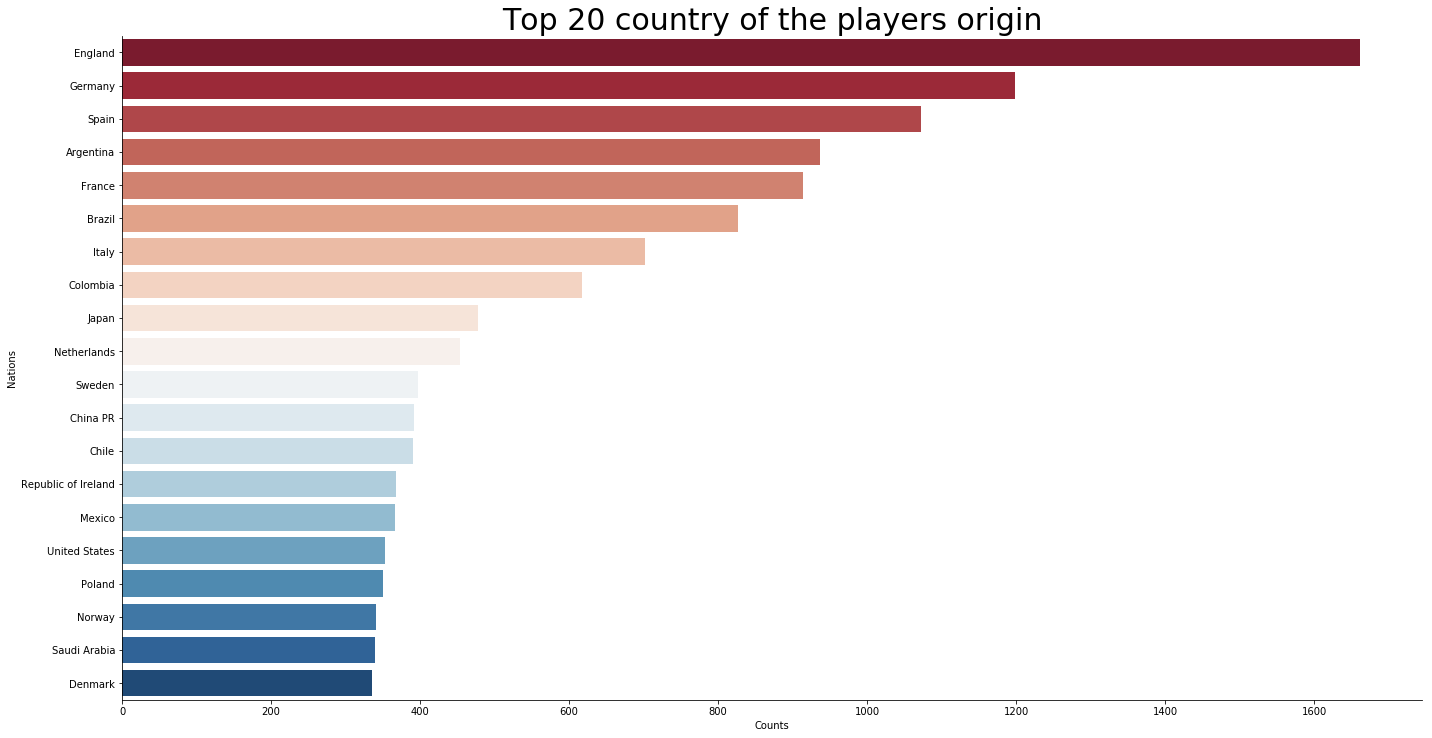

In [29]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top20,
            palette="RdBu",height=10,kind="bar",aspect=2)
plt.title("Top 20 country of the players origin",
          fontsize=30);

In [31]:
avgwageoverall = soccer_data.groupby("Nationality", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()


,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492


In [32]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492
27,Central African Rep.,19.000000,73.333333
13,Belgium,18.480769,68.811538
2,Algeria,18.083333,70.633333
20,Brazil,17.778718,71.251511
47,Equatorial Guinea,17.200000,70.000000


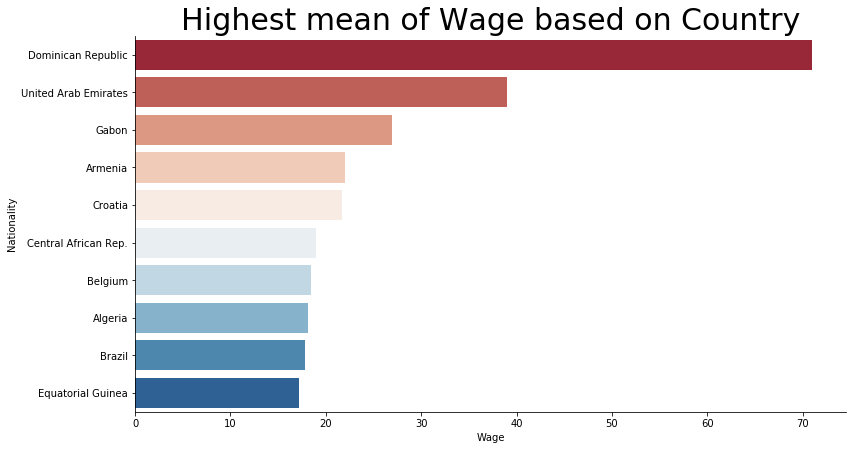

In [34]:
sns.catplot(y="Nationality",
            x="Wage",data=top10bywage,
            palette="RdBu",height=6,kind="bar",aspect=2)
plt.title("Highest mean of Wage based on Country",
          fontsize=30);

In [35]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Nationality,Wage,Overall
156,United Arab Emirates,39.000000,77.000000
27,Central African Rep.,19.000000,73.333333
77,Israel,15.857143,72.142857
42,Dominican Republic,71.000000,72.000000
147,São Tomé & Príncipe,15.000000,72.000000
116,Oman,12.000000,72.000000
26,Cape Verde,11.526316,71.631579
123,Portugal,14.310559,71.344720
150,Togo,16.000000,71.333333
20,Brazil,17.778718,71.251511


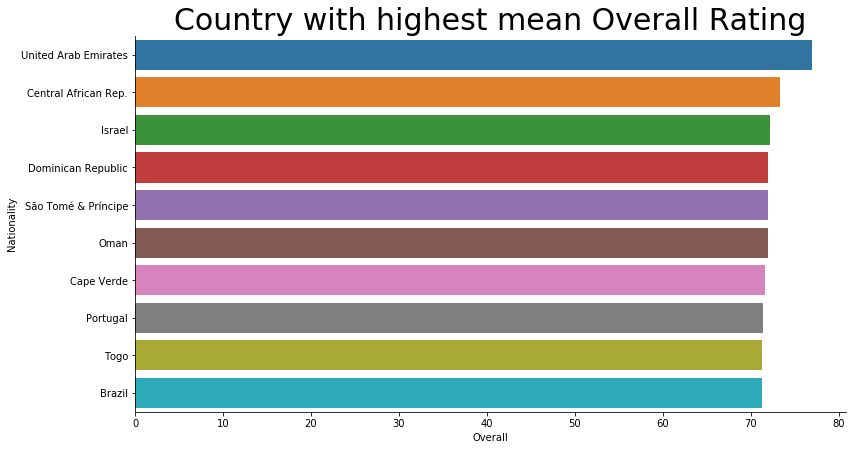

In [36]:
sns.catplot(y="Nationality",
            x="Overall",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Country with highest mean Overall Rating",
          fontsize=30);

In [37]:
avgwageoverall = soccer_data.groupby("Club", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424


In [38]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424
134,Chelsea,98.454545,76.787879
363,Liverpool,87.939394,76.000000
583,Tottenham Hotspur,79.484848,76.696970
214,FC Bayern München,78.827586,77.000000
52,Arsenal,78.424242,75.181818


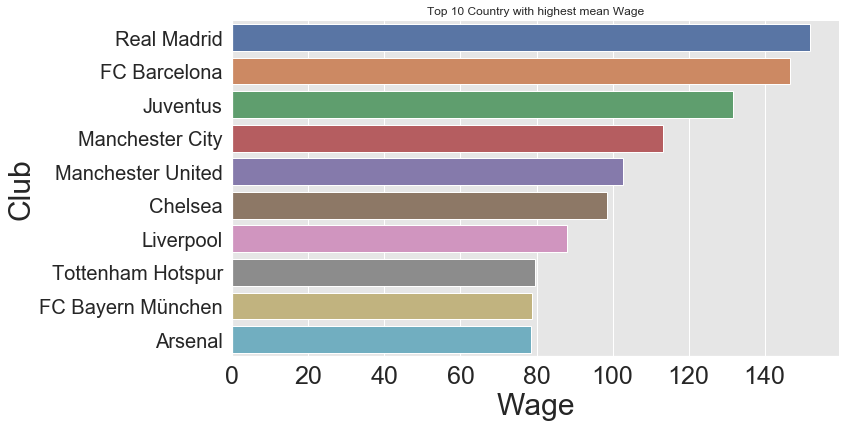

In [39]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="Club",
            x="Wage",data=top10bywage,
           height=6,kind="bar",aspect=2)
plt.title("Top 10 Country with highest mean Wage");